In [35]:
# Data_Exploration.ipynb

# Import necessary libraries
import sys
sys.path.insert(0, '../')  # This adds the parent directory to the system path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

# Reload modules in case of modifications
import importlib
import Scripts.data_loader
importlib.reload(Scripts.data_loader)
from Scripts.data_loader import load_data

# Also import your preprocessing module
import Scripts.preprocess
importlib.reload(Scripts.preprocess)
from Scripts.preprocess import clean, remove_stopwords

# Ensure that the full text of each article is viewable
pd.set_option('display.max_colwidth', None)

# Load the data
df = load_data('../Data/data-jsons', limit=100)

# Apply the preprocessing functions (assuming your text is in a column named 'content')
df['content'] = df['content'].apply(clean)
df['content'] = df['content'].apply(remove_stopwords)

# Now you can proceed with your data exploration and visualization


[nltk_data] Downloading package punkt to /Users/emmaazzi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmaazzi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/emmaazzi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
# Look at the first few rows of the DataFrame to understand how the data is structured
print(df.head())

# Get a summary of the DataFrame to identify missing values and understand data types
print(df.info())

# Get statistical summaries of numerical fields
print(df.describe())

       topic            source  bias  \
0   politics          Politico     0   
1      china         Bloomberg     1   
2  terrorism  Washington Times     2   
3   politics             Salon     0   
4   politics    CNN (Web News)     0   

                                                                                                                  url  \
0             https://www.politico.com/news/magazine/2019/11/13/trump-impeachment-hearing-change-mind-congress-070145   
1  https://www.bloomberg.com/news/articles/2018-07-11/trump-s-tariff-barrage-pushes-china-fight-to-point-of-no-return   
2                 http://www.washingtontimes.com/news/2014/sep/16/top-general-foley-rescue-highest-risk-mission-ever/   
3   http://www.salon.com/2014/11/12/americas_post_midterm_inferno_tea_party_garbage_media_nonsense_and_economic_hell/   
4                                                   http://www.cnn.com/2014/01/08/politics/christie-bridge/index.html   

                                

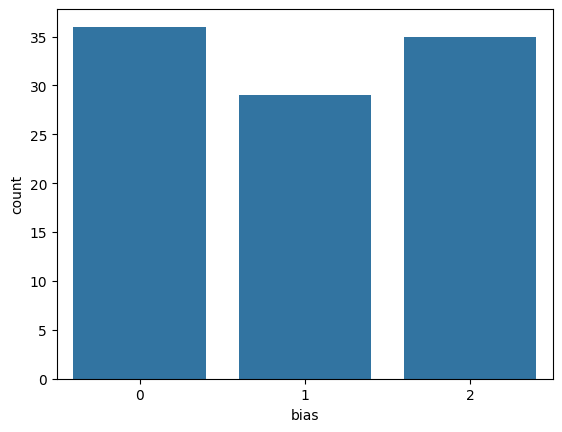

In [23]:
# Check the distribution of the 'bias' variable since it's a key point of interest
sns.countplot(x='bias', data=df)
plt.show()

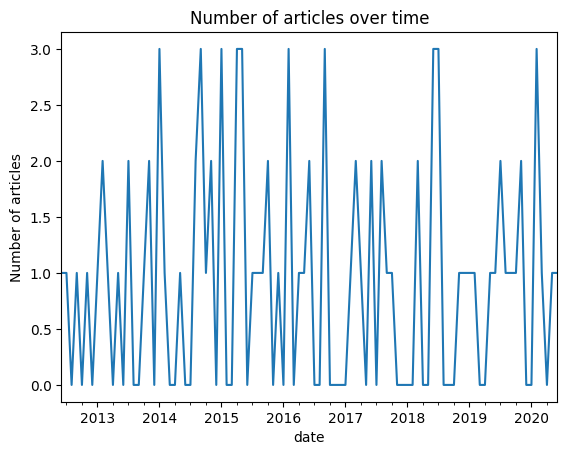

In [24]:
#Distribution of articles over time
df['date'] = pd.to_datetime(df['date'])  # Ensure that 'date' is in datetime format
df.set_index('date', inplace=True)
df['count'] = 1  # This will help to aggregate the counts
df.resample('M').sum()['count'].plot()  # Resample by month and plot
plt.title('Number of articles over time')
plt.ylabel('Number of articles')
plt.show()

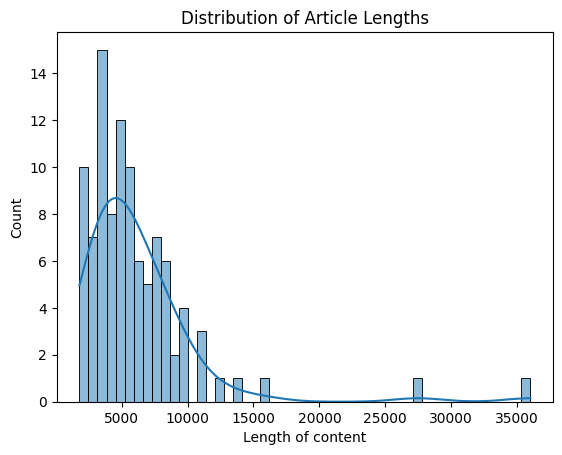

In [25]:
#Length of articles:
df['content_length'] = df['content'].apply(len)
sns.histplot(df['content_length'], bins=50, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Length of content')
plt.show()

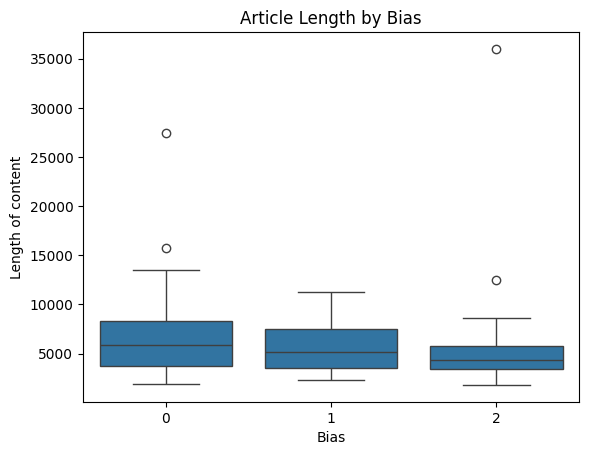

In [26]:
#Relationship between length of articles and bias
sns.boxplot(x='bias', y='content_length', data=df)
plt.title('Article Length by Bias')
plt.xlabel('Bias')
plt.ylabel('Length of content')
plt.show()

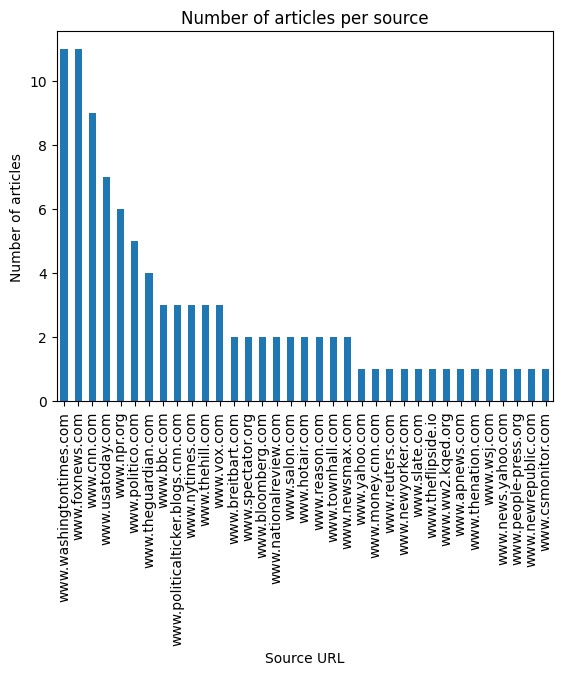

In [27]:
#How many articles there are per source
source_counts = df['source_url'].value_counts()
source_counts.plot(kind='bar')
plt.title('Number of articles per source')
plt.xlabel('Source URL')
plt.ylabel('Number of articles')
plt.show()
